# Garments Project (by: The Guo Family)

Garmets are worn every day by humans around the world. From the famous and highly sought after fashion houses such as the Haus of Gucci, Louis Vitton, Dior, down to the smaller fashion labels, humans have the tendency to buy what is on the shelf. But, behind all the garments that are sold on a day to day basis, what goes behind the scenes? In this project, we want to look at the reasoning between the overtime that happens in this current fashion house together with making three (3) models to predict the number of overtime that will happen in the future.

In [130]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
import os

In [131]:
df = pd.read_csv('garments.csv') # Importing garments.csv file to a pandas dataframe

After importing the dataset into the dataframe, we now look for errors and see what can we do for null cells.

In [132]:
# Dataset structure
print(df.info())  # Column names, data types, and non-null counts
print(df.describe())  # Statistics for numeric columns
print(df.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We see that there are null values in the WIP column, highlighted in the figure below:

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


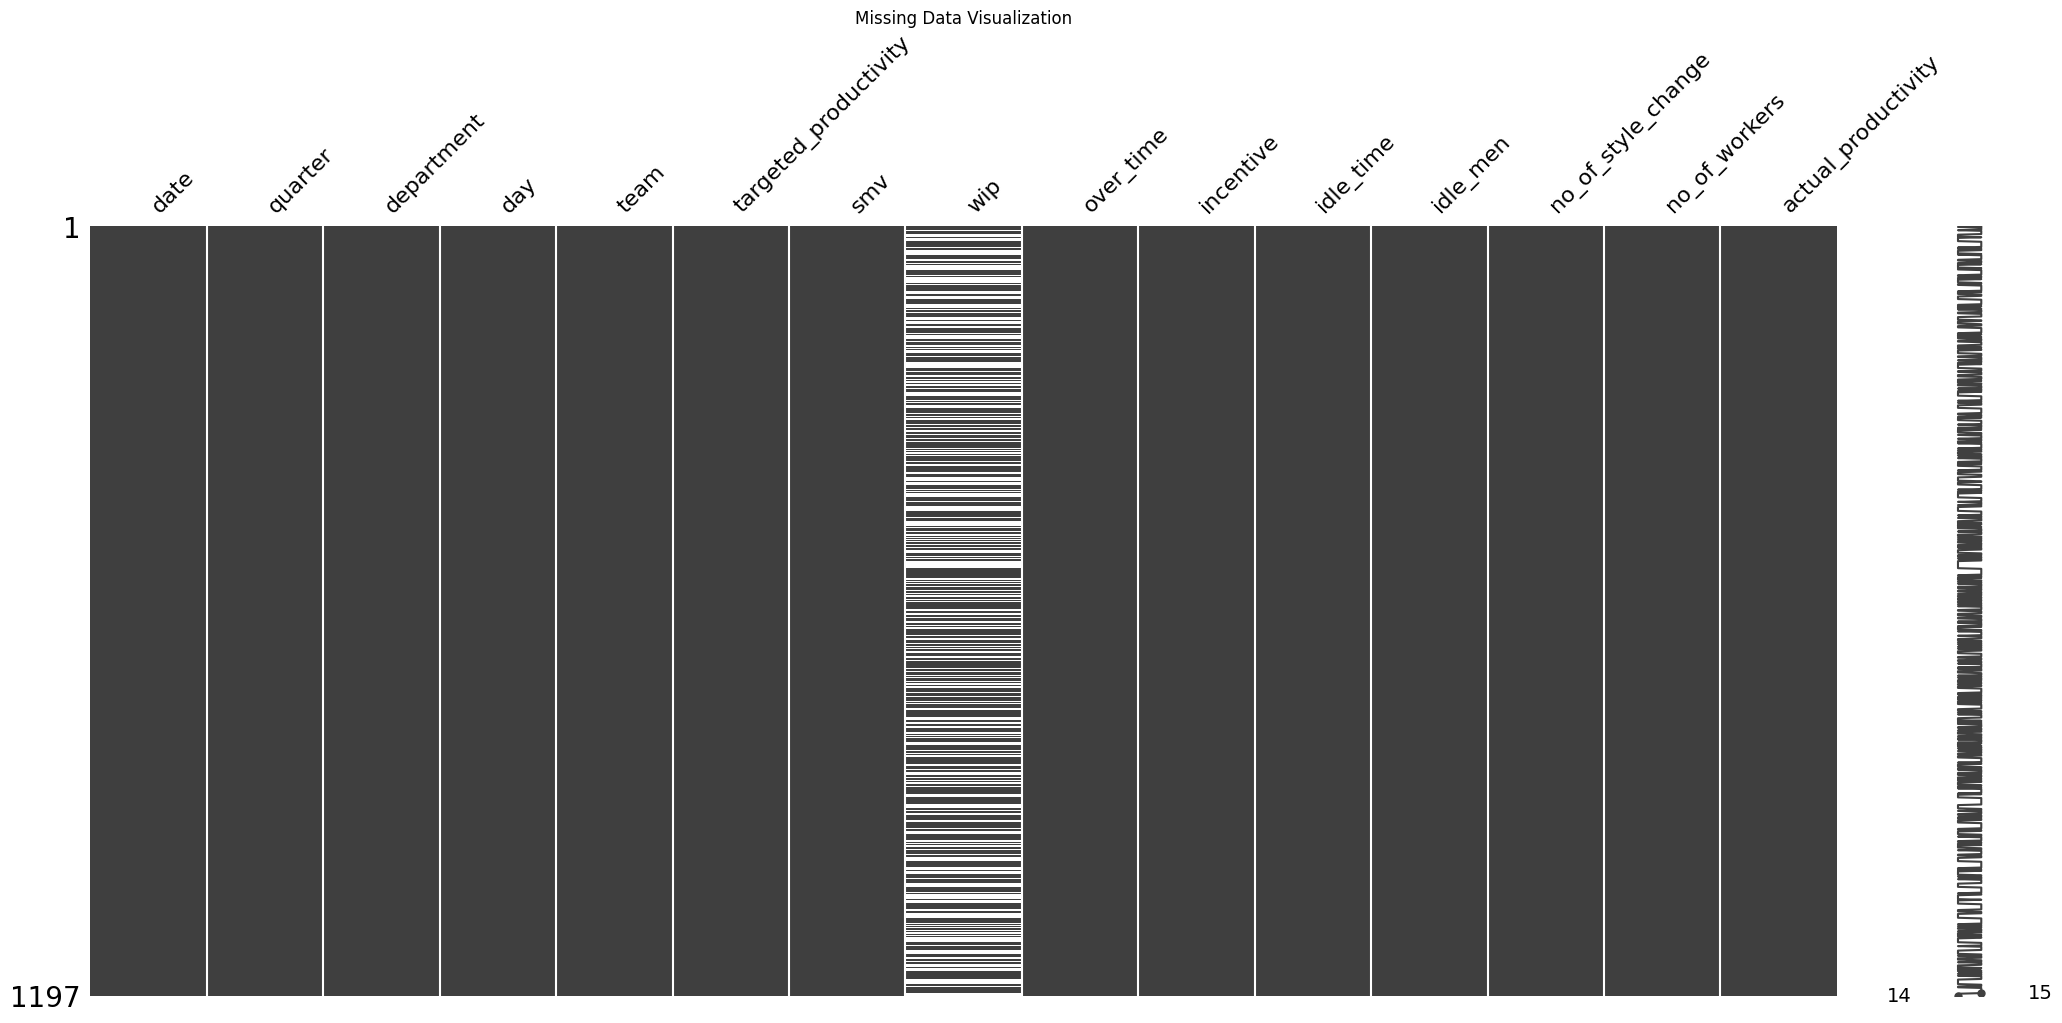

In [133]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

The team chose to replace empty cells with zero. This is doable since WIP stands for "work in progress" if the cell is null, it means that there are no projects that are "work in progress", making them null.

In [134]:
# Replace NaN values with 0
df = df.fillna(0)

# Replace empty strings with 0
df = df.replace('', 0)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


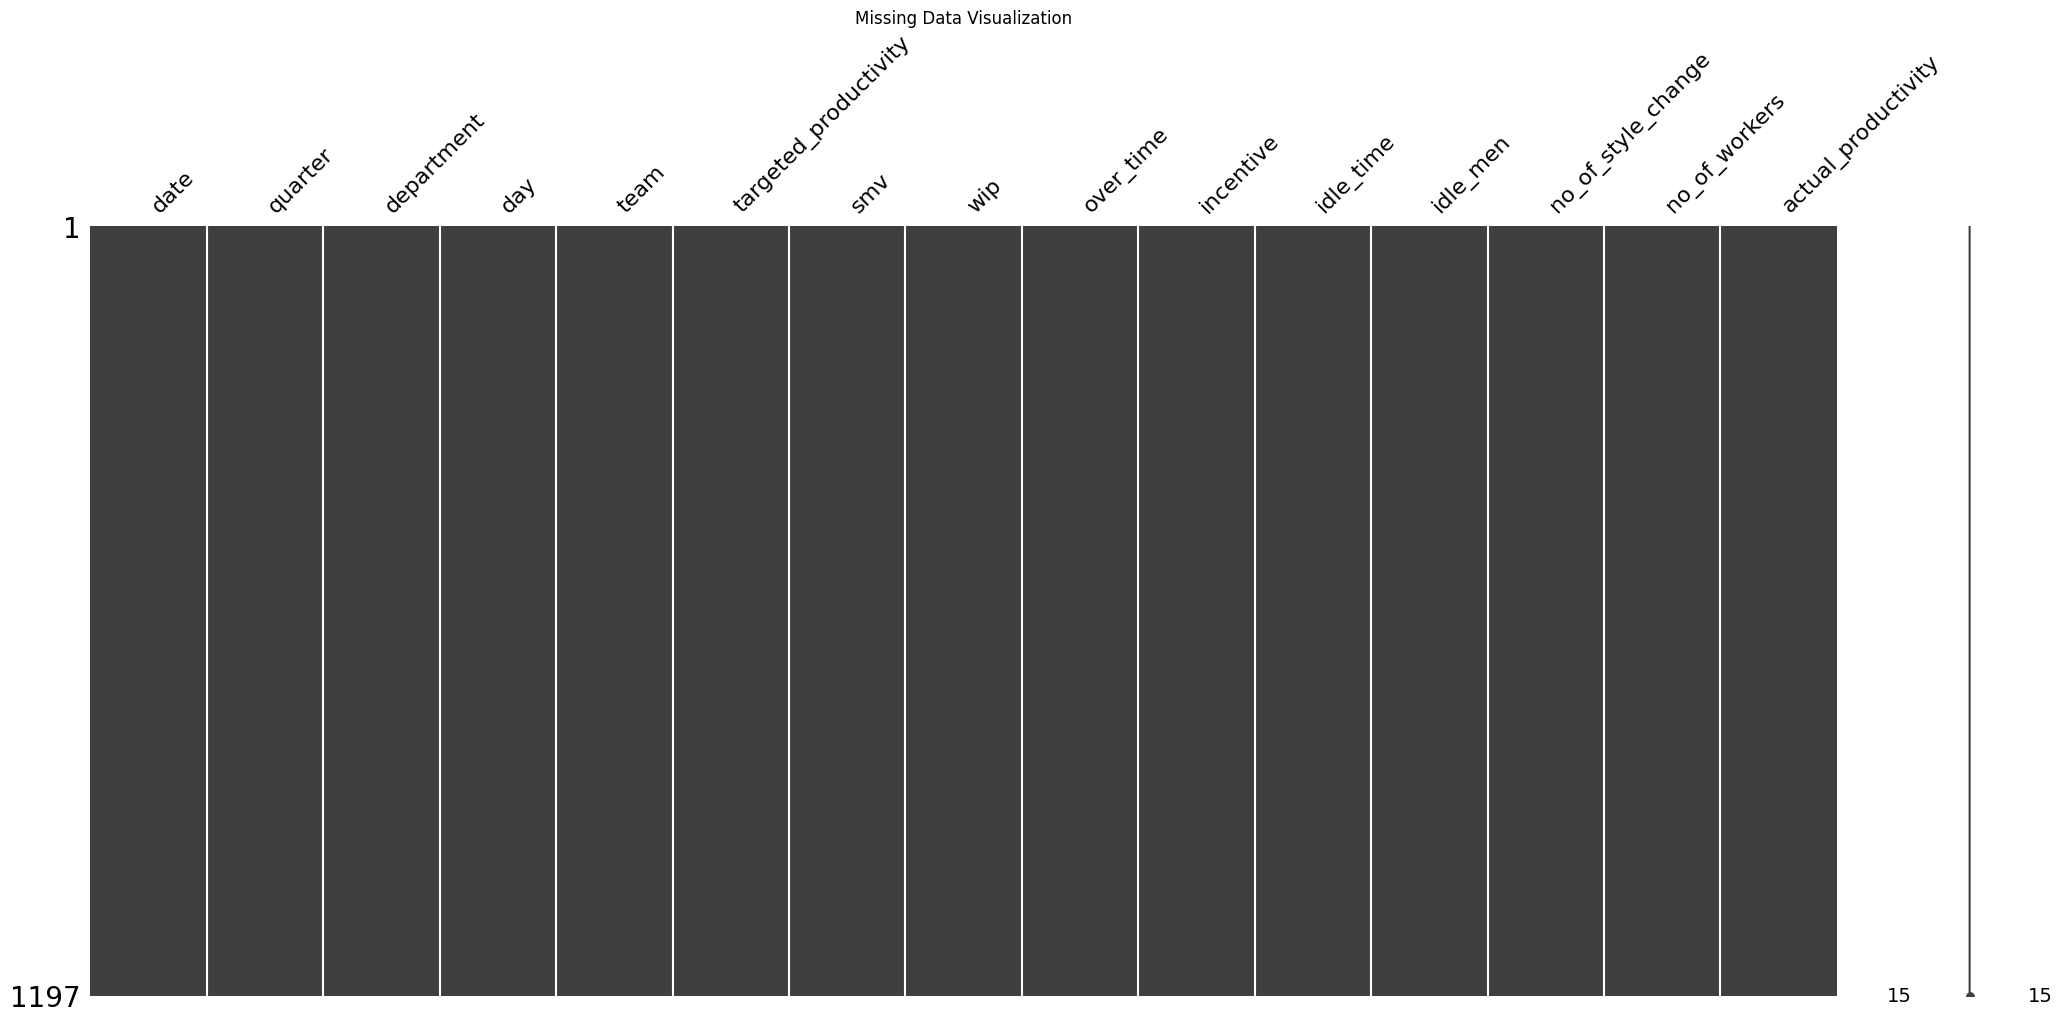

In [135]:
# Count missing values per column
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

Here we're making sure that the dataset does not have any more null cells.

Afterwards, we normalize the values to make sure that all numerical features have the same impact on the model.

In [136]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men',
                        'no_of_style_change', 'no_of_workers']
numeric_columns = df[true_numeric_columns]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns and update the DataFrame
df[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

After normalizing the values, we move on to adding some columns to help with parsing through data.

In [137]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month  # Extract the month

Finally, we move on to looking at the data itself and see what does it mean to this certain fashion haus.

# Exploring the data

Firstly, we look at the distribution of each numerical data and see what it means to the data itself.

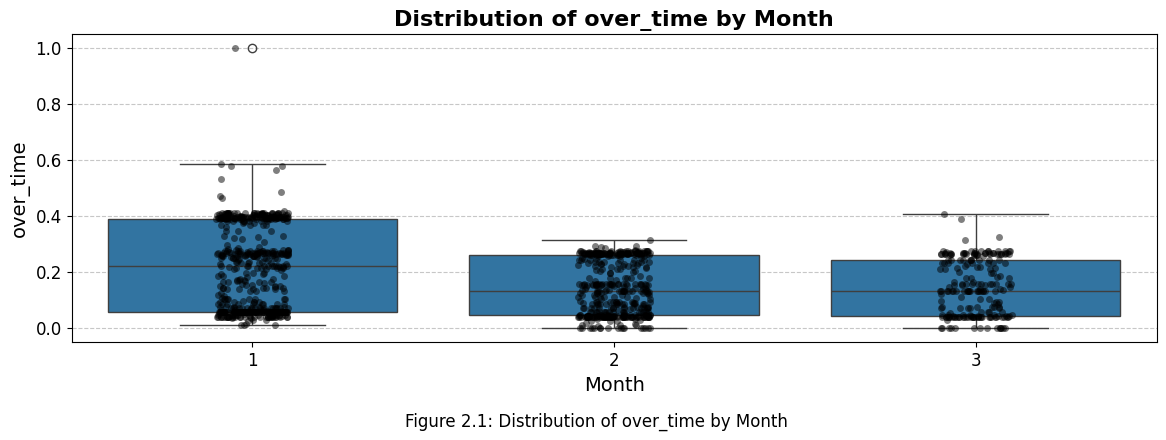

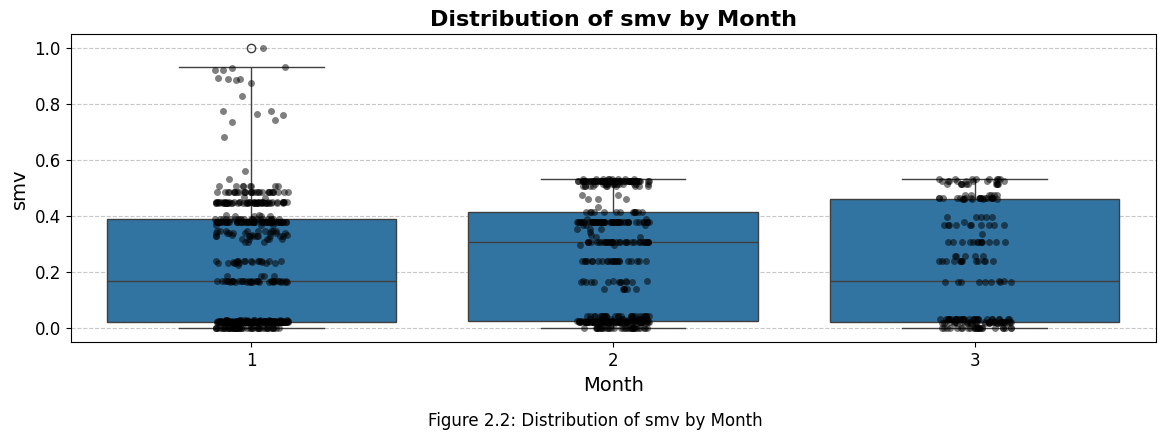

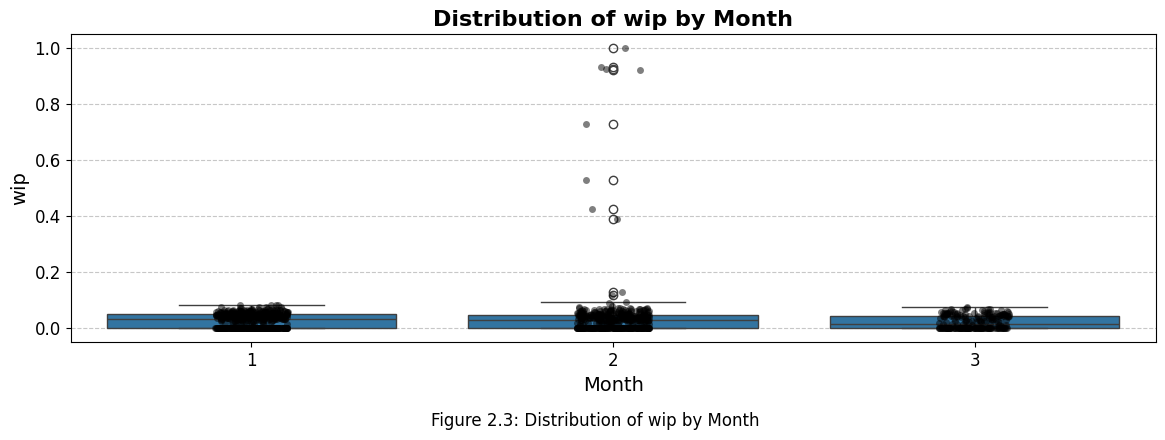

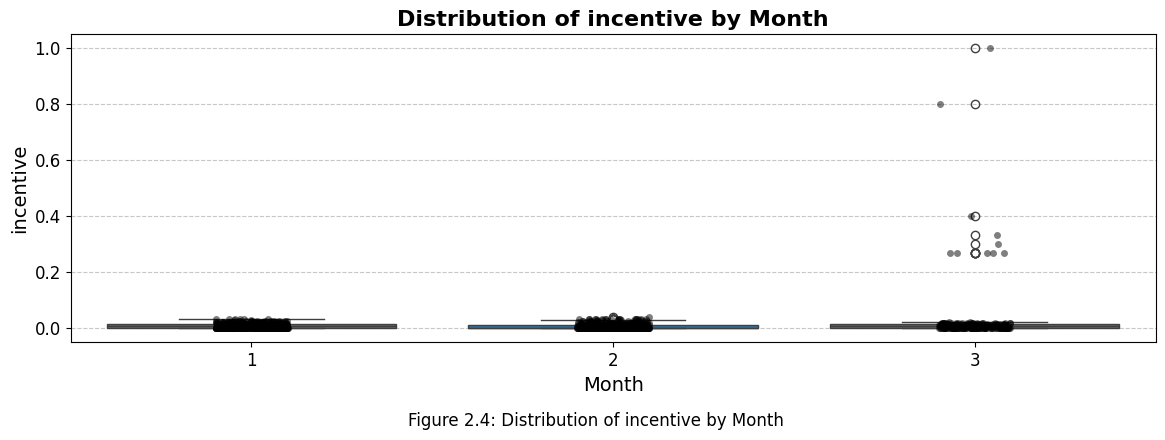

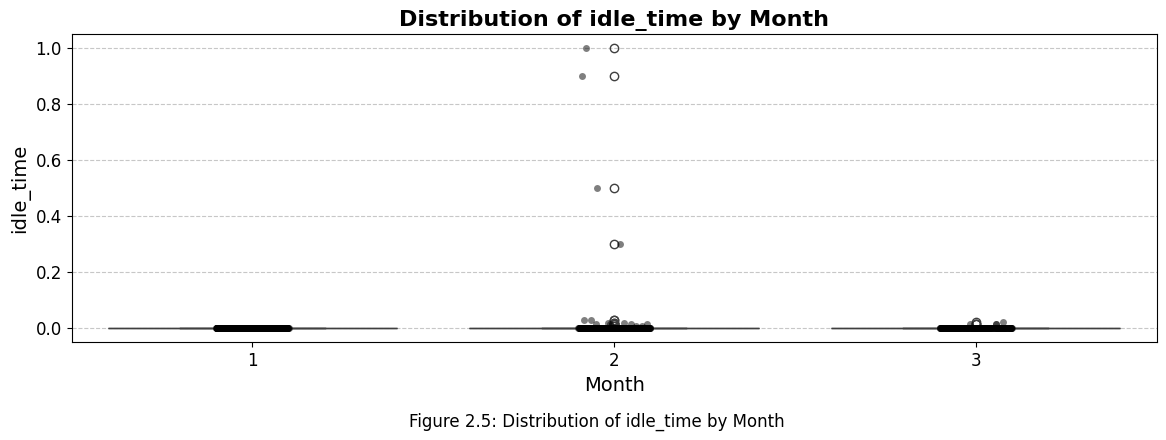

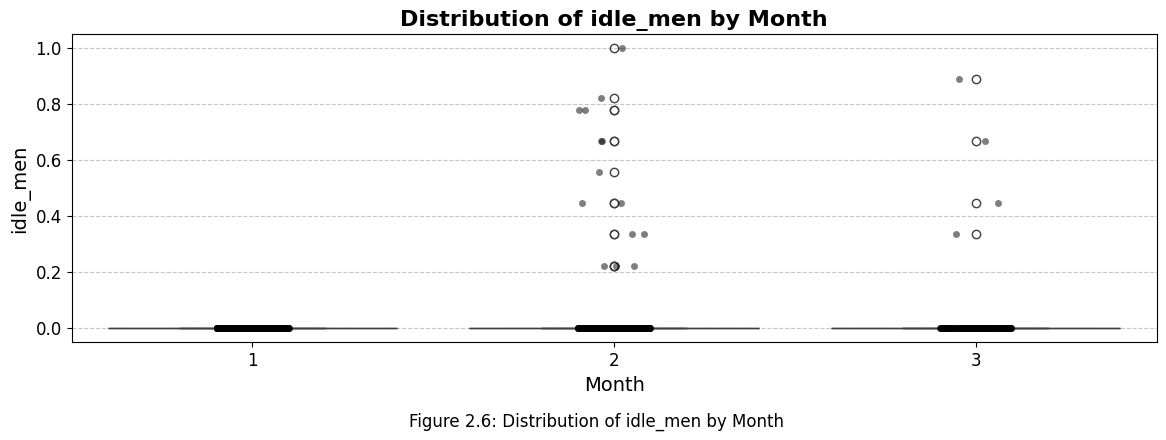

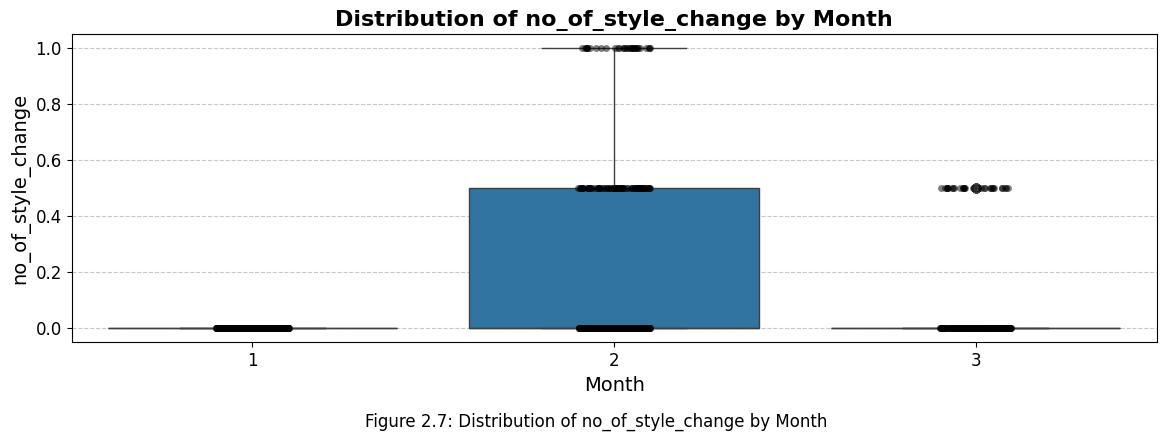

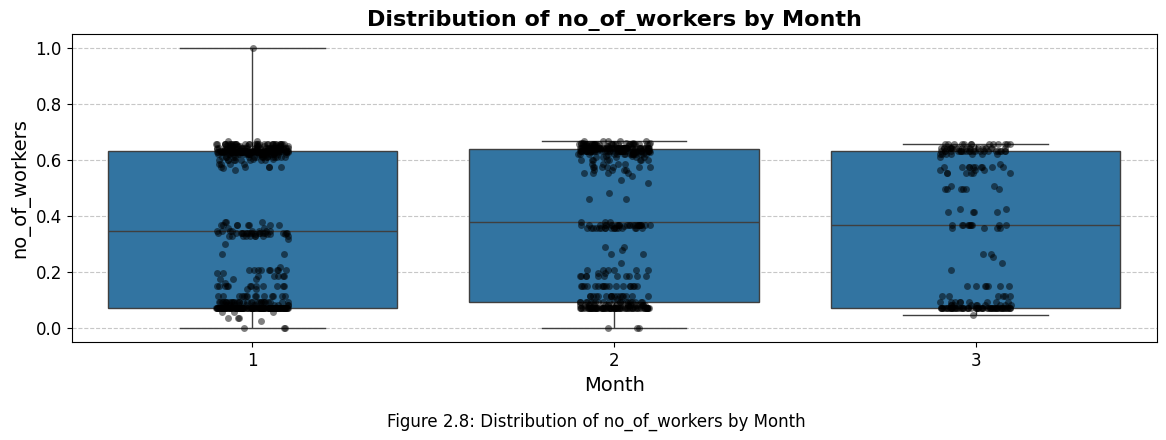

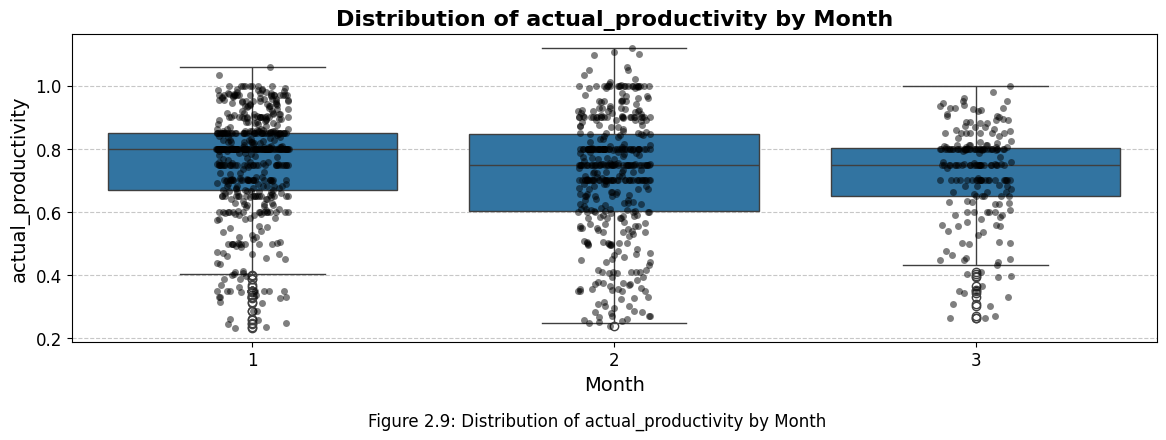

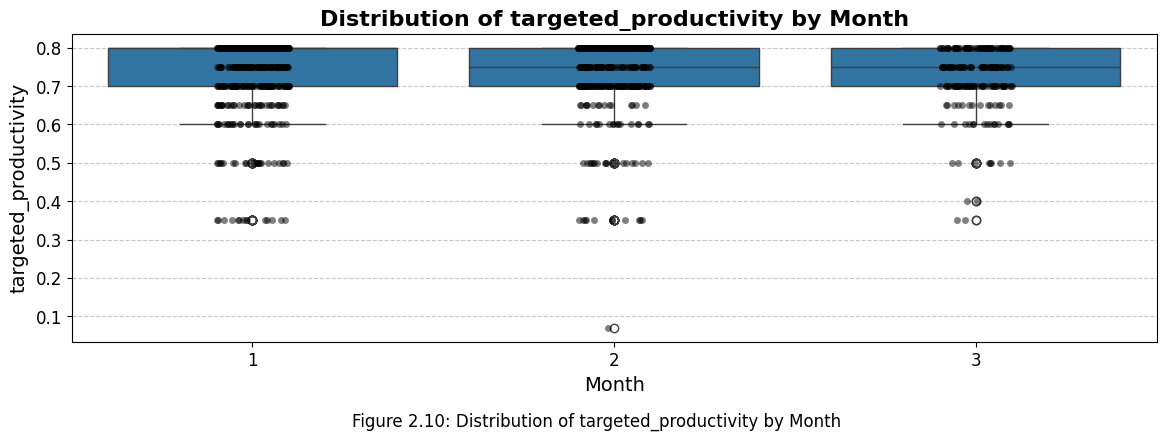

In [138]:
true_numeric_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men',
                        'no_of_style_change', 'no_of_workers', 'actual_productivity', 'targeted_productivity']

# Ensure output directory exists
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)

# Starting figure number
figure_number = 2.1

# Starting figure number
major_figure_number = 2  # Represents the major part (e.g., 2.x)
minor_figure_number = 1  # Represents the minor part (e.g., x.1)

# Visualize distributions of numeric columns
for col in true_numeric_columns:
    figure_number = f"{major_figure_number}.{minor_figure_number}" # Combine major and minor figure numbers for the filename
    plt.figure(figsize=(14, 4))  # Adjust figure size
    sns.boxplot(x='month', y=col, data=df, showfliers=True)  # Boxplot
    sns.stripplot(x='month', y=col, data=df, color='black', alpha=0.5, jitter=0.1, dodge=False)  # Reduced jitter
    plt.title(f'Distribution of {col} by Month', fontsize=16, fontweight='bold')  # Title
    plt.xlabel('Month', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    plt.figtext(0.5, -0.1, f"Figure {figure_number}: Distribution of {col} by Month", ha='center', fontsize=12) # Add figure label as a caption


    figure_filename = os.path.join(output_dir, f"Figure_{figure_number}.png")
    plt.savefig(figure_filename, bbox_inches='tight')

    # Increment the minor figure number
    minor_figure_number += 1

    plt.show()


As shown in Figure 2.1, it shows the distribution of over time per month. The chart shows different patterns in overtime hours over three months. In Month 1, the median overtime is higher and more varied than in Months 2 and 3. This might mean there's a seasonal pattern, like a busy time with more work or production, possibly due to certain needs or deadlines. Also, some extreme values in Month 1, almost reaching the highest possible overtime of 1.0, could be due to unusual events, like sudden staff shortages or urgent project needs, causing some workers or days to have much higher overtime.

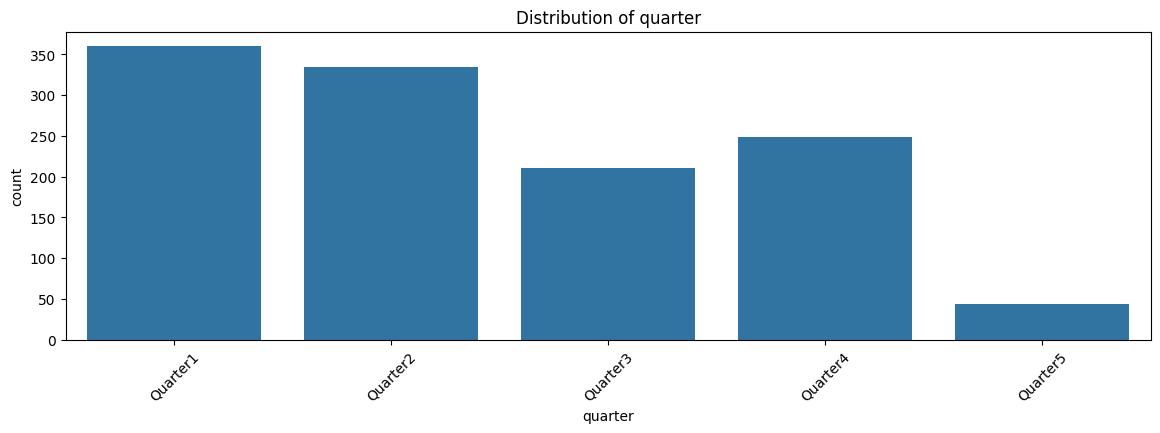

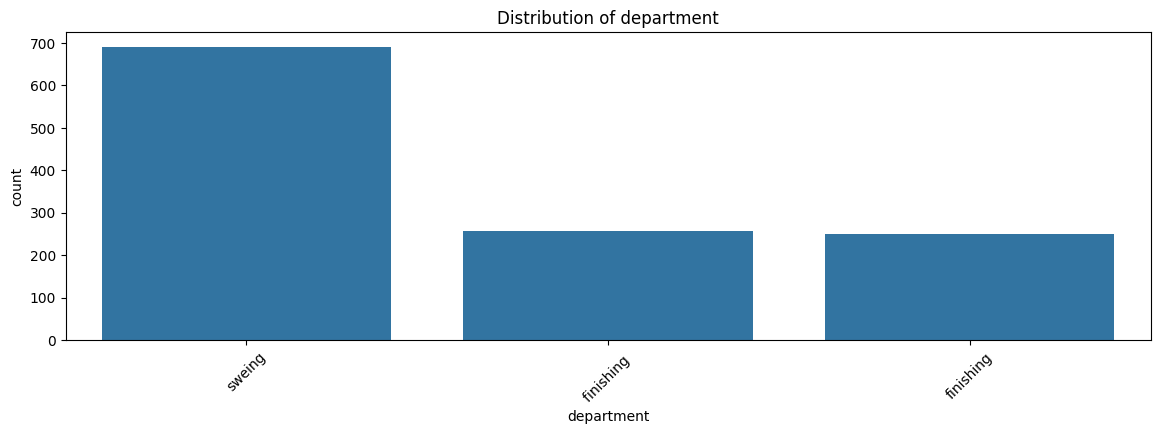

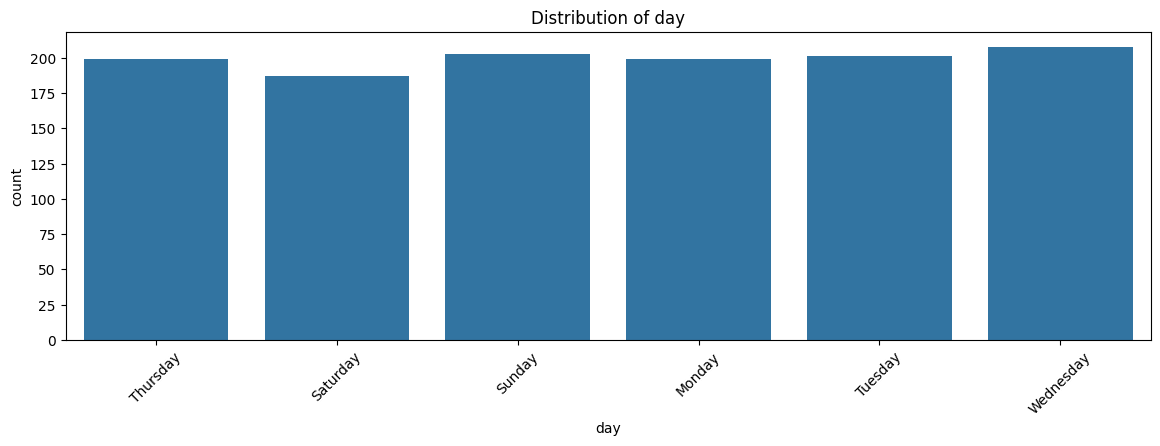

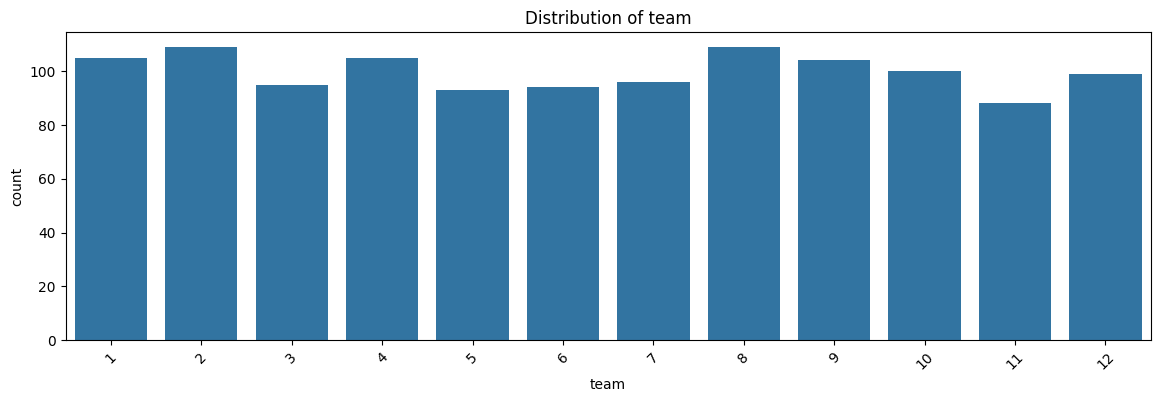

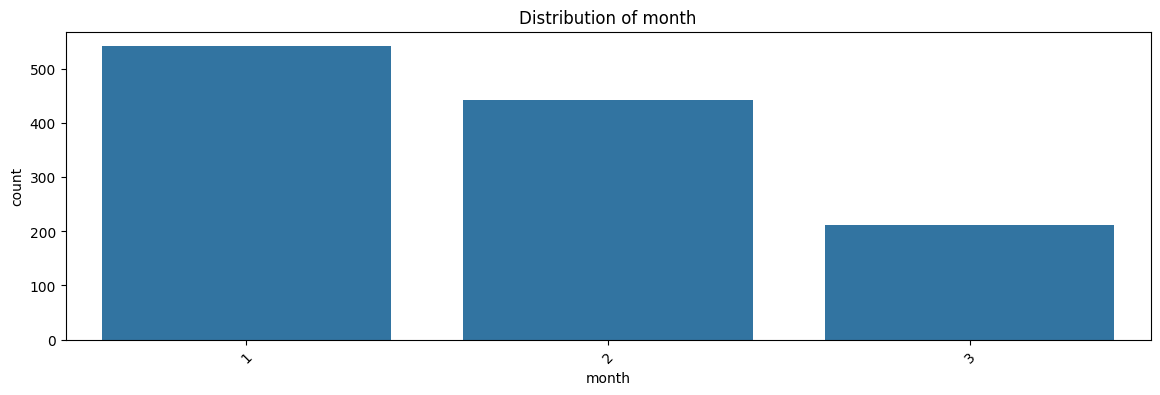

In [139]:
# Create a list of columns excluding the true numeric ones
remaining_columns = [col for col in df.columns if col not in true_numeric_columns and col != 'date']

# Filter the remaining categorical columns (assuming they're not numeric)
categorical_columns = df[remaining_columns]

# Check unique values and distributions for the remaining categorical features
for col in categorical_columns:
    plt.figure(figsize=(14, 4))  # Width: 14 inches, Height: 8 inches
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

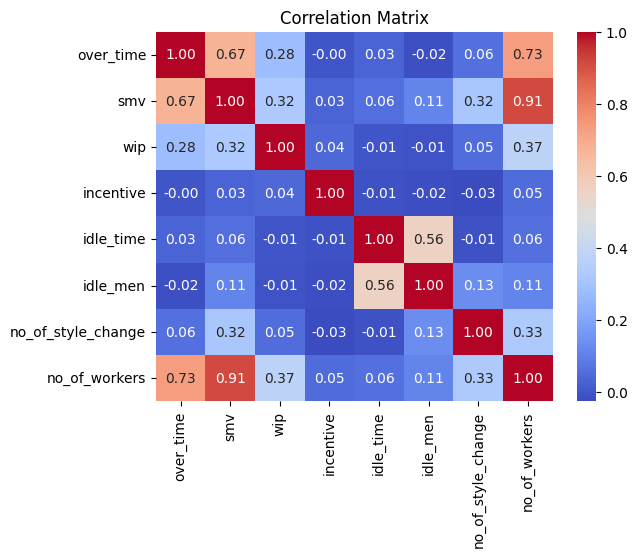

Correlation with Overtime:
 over_time             1.000000
no_of_workers         0.734164
smv                   0.674887
wip                   0.276529
no_of_style_change    0.059790
idle_time             0.031038
incentive            -0.004793
idle_men             -0.017913
Name: over_time, dtype: float64


In [140]:
# Correlation matrix
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlations with 'over_time'
correlation_with_overtime = numeric_columns.corr()['over_time'].sort_values(ascending=False)
print("Correlation with Overtime:\n", correlation_with_overtime)


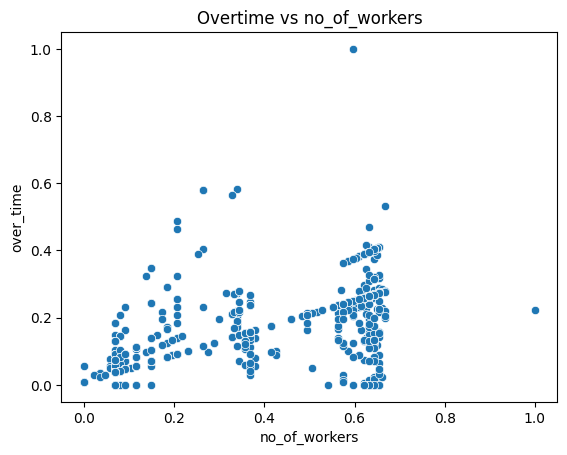

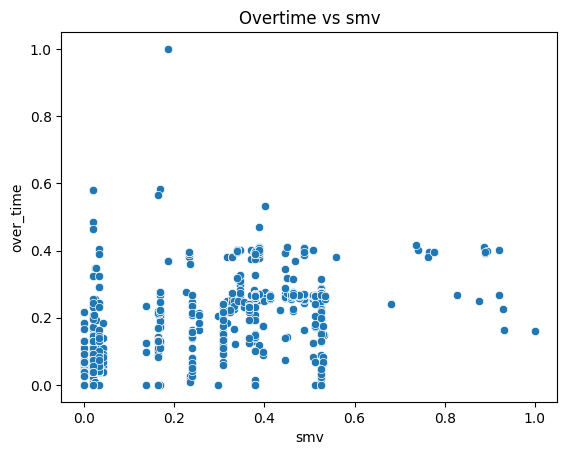

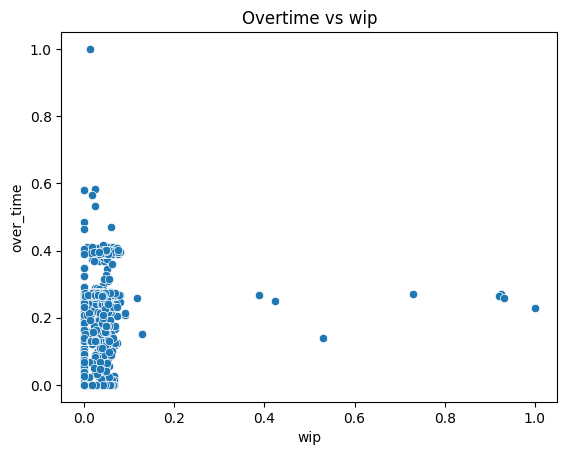

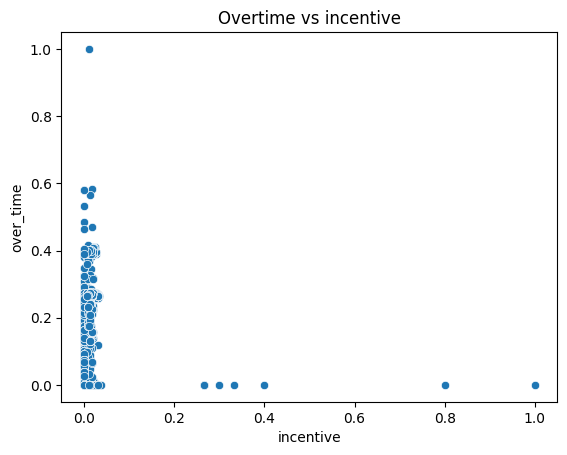

In [141]:
# Scatterplots for numeric columns
for col in ['no_of_workers', 'smv', 'wip', 'incentive']:
    sns.scatterplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime vs {col}')
    plt.show()


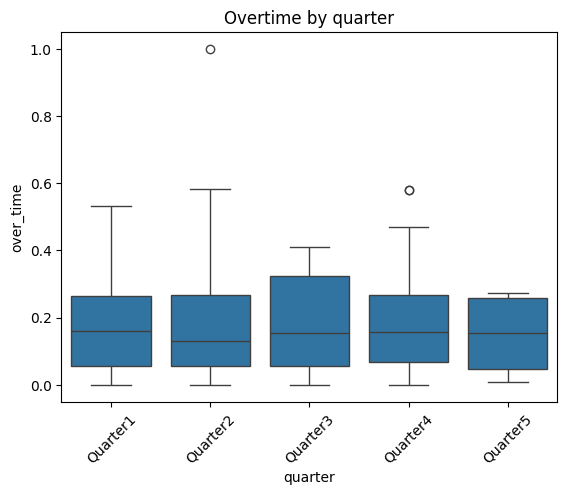

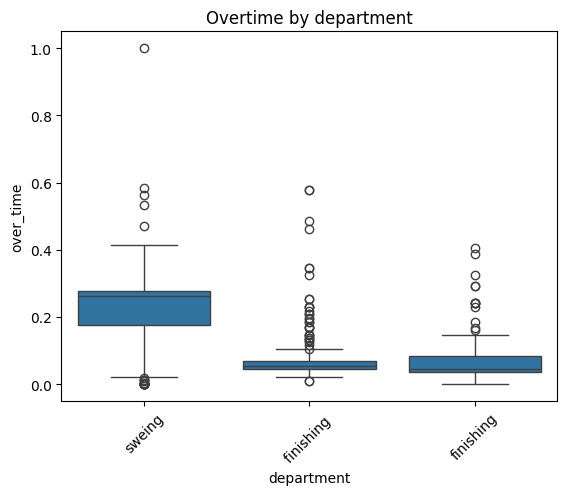

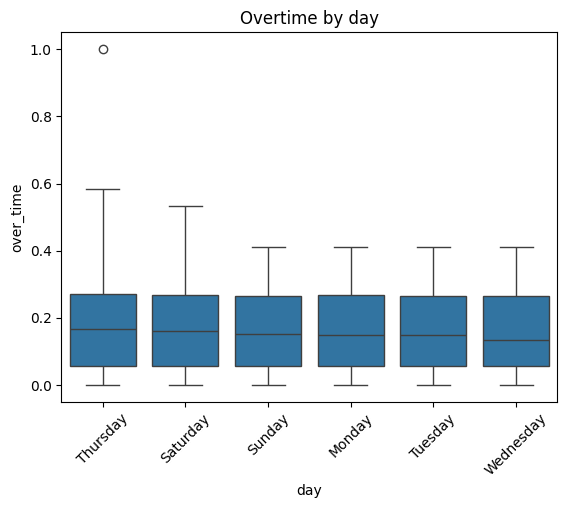

In [142]:
# Boxplots for categorical features
for col in ['quarter', 'department', 'day']:
    sns.boxplot(x=col, y='over_time', data=df)
    plt.title(f'Overtime by {col}')
    plt.xticks(rotation=45)
    plt.show()


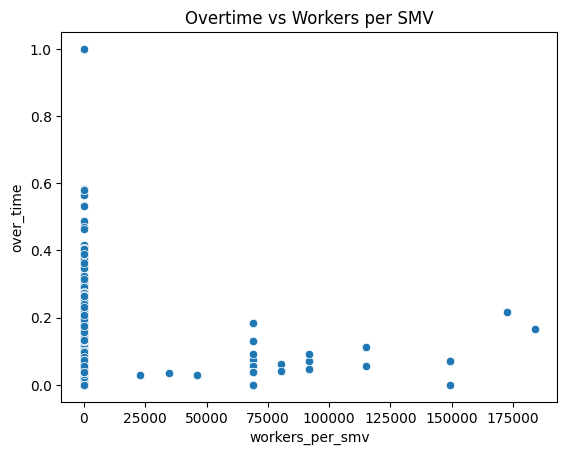

         over_time           targeted_productivity actual_productivity
              mean       std                  mean                mean
quarter                                                               
Quarter1  0.172875  0.111714              0.744083            0.751560
Quarter2  0.168018  0.140886              0.732090            0.743710
Quarter3  0.188889  0.140572              0.721190            0.704759
Quarter4  0.187162  0.129010              0.714516            0.709067
Quarter5  0.143729  0.105291              0.718182            0.826177


In [143]:
# Interaction terms (e.g., workers_per_smv)
df['workers_per_smv'] = df['no_of_workers'] / (df['smv'] + 1e-6)
sns.scatterplot(x='workers_per_smv', y='over_time', data=df)
plt.title('Overtime vs Workers per SMV')
plt.show()

# Group-Wise Analysis
grouped = df.groupby('quarter').agg({
    'over_time': ['mean', 'std'],
    'targeted_productivity': ['mean'],
    'actual_productivity': ['mean']
})
print(grouped)


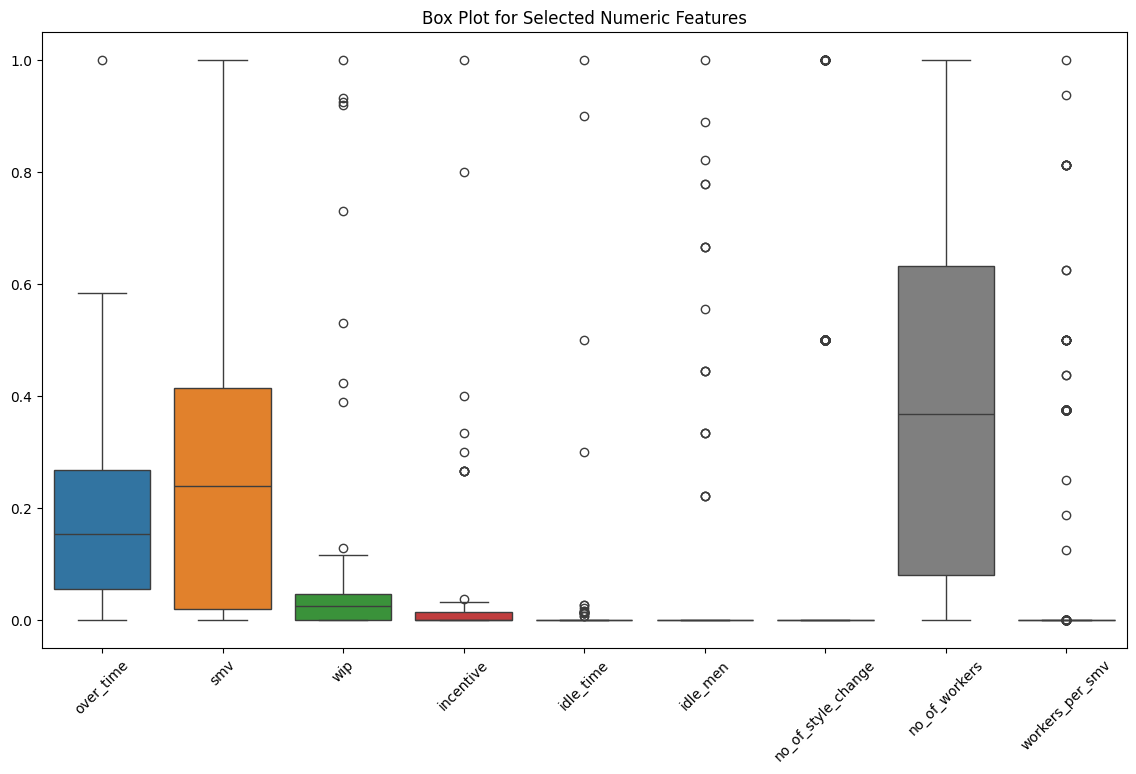

Outliers:
           date   quarter  department       day  team  targeted_productivity  \
138 2015-01-08  Quarter2      sweing  Thursday    12                   0.80   
139 2015-01-08  Quarter2      sweing  Thursday     6                   0.80   
146 2015-01-08  Quarter2      sweing  Thursday    11                   0.35   
383 2015-01-22  Quarter4  finishing   Thursday     1                   0.70   
384 2015-01-22  Quarter4  finishing   Thursday     2                   0.70   

          smv       wip  over_time  incentive  idle_time  idle_men  \
138  0.168602  0.023700   0.583333   0.017500        0.0       0.0   
139  0.164731  0.017775   0.564815   0.013889        0.0       0.0   
146  0.186218  0.012412   1.000000   0.010556        0.0       0.0   
383  0.020132  0.000000   0.578704   0.000000        0.0       0.0   
384  0.020132  0.000000   0.578704   0.000000        0.0       0.0   

     no_of_style_change  no_of_workers  actual_productivity  month  \
138                 0.0

In [144]:
# Normalize the 'workers_per_smv' column
df['workers_per_smv'] = scaler.fit_transform(df[['workers_per_smv']])

# Define the columns to include in the boxplot
selected_columns = ['over_time', 'smv', 'wip', 'incentive', 'idle_time', 'idle_men',
                    'no_of_style_change', 'no_of_workers', 'workers_per_smv']

# Boxplot for selected numeric features
plt.figure(figsize=(14, 8))  # Width: 14 inches, Height: 8 inches
sns.boxplot(data=df[selected_columns])  # Use only the selected columns
plt.title('Box Plot for Selected Numeric Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Z-score method for outlier detection
df['z_score'] = zscore(df['over_time'])
outliers = df[df['z_score'].abs() > 3]
print("Outliers:\n", outliers)


<ipython-input-145-12954436db90>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['over_time'].resample('M').mean().plot()


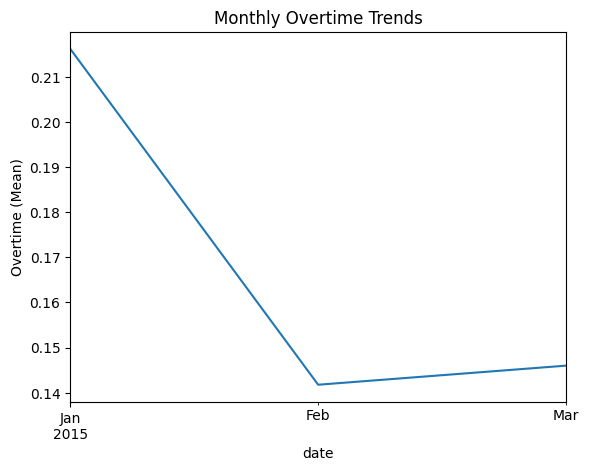

In [145]:
# Trends over time
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df['over_time'].resample('M').mean().plot()
plt.title('Monthly Overtime Trends')
plt.ylabel('Overtime (Mean)')
plt.show()


# Linear Regression

Linear regression is a good choice for predicting overtime minutes since the the relationship between features, such as no. of workers, works and number of unfinished items, and the target is roughly linear. It provides simplicity and interpretability, as the model coefficients clearly indicate how the features influence overtime minutes. Additionally, since it is computationally efficient, linear regression is particularly suitable for predicting continuous variables like overtime minutes, especially in smaller or less complex datasets like these.

## Data Pre-processing

Before we start with our model, let's take a look again and pre-process the data.

In [367]:
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score


In [368]:
df.head(n=6)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,workers_per_smv,z_score
date,,,,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.940725,1,0.000008,0.750589
2015-01-01,Quarter1,finishing,Thursday,1,0.75,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.886500,1,0.000019,-1.077682
2015-01-01,Quarter1,sweing,Thursday,11,0.80,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570,1,0.000011,-0.271092
2015-01-01,Quarter1,sweing,Thursday,12,0.80,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570,1,0.000011,-0.271092
2015-01-01,Quarter1,sweing,Thursday,6,0.80,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.800382,1,0.000008,-0.790895
2015-01-01,Quarter1,sweing,Thursday,7,0.80,0.445219,0.042557,0.259259,0.010556,0.0,0.0,0.0,0.620690,0.800125,1,0.000008,0.643044


We can use this plot as a simple basis for the predictions

<Axes: ylabel='Frequency'>

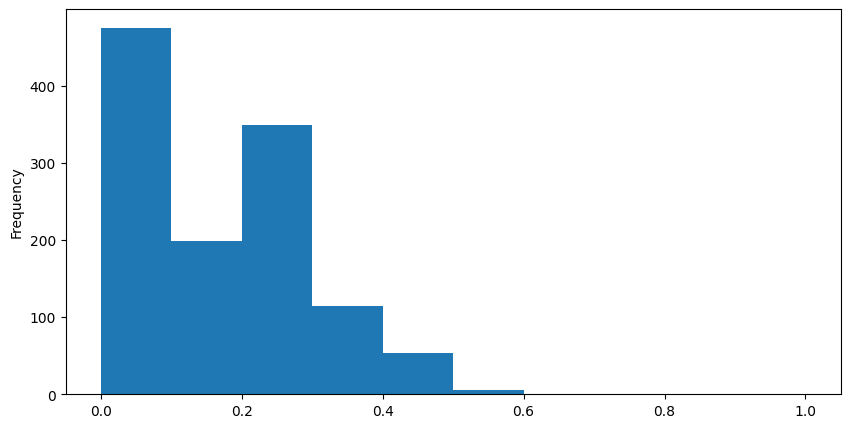

In [369]:
plt.figure(figsize = (10,5))
df['over_time'].plot(kind = "hist")

In [370]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month',
       'workers_per_smv', 'z_score'],
      dtype='object')

To pre-process the data, we must first drop all the categorical or irrelevant data to the regression model, which are unsuitable for linear regression.

In [371]:
df_linear = df.drop(['quarter',	'department', 'team', 'day', 'month'], axis = 1)
x = df_linear.drop(['over_time'], axis = 1)
y = df_linear['over_time']
df_linear.head(n=6)
df_linear.columns

Index(['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'workers_per_smv', 'z_score'],
      dtype='object')

Let's take a look again at the heatmap for the values since it will help us identify relationships between features and the `over_time`, as well as multicollinearity between features.

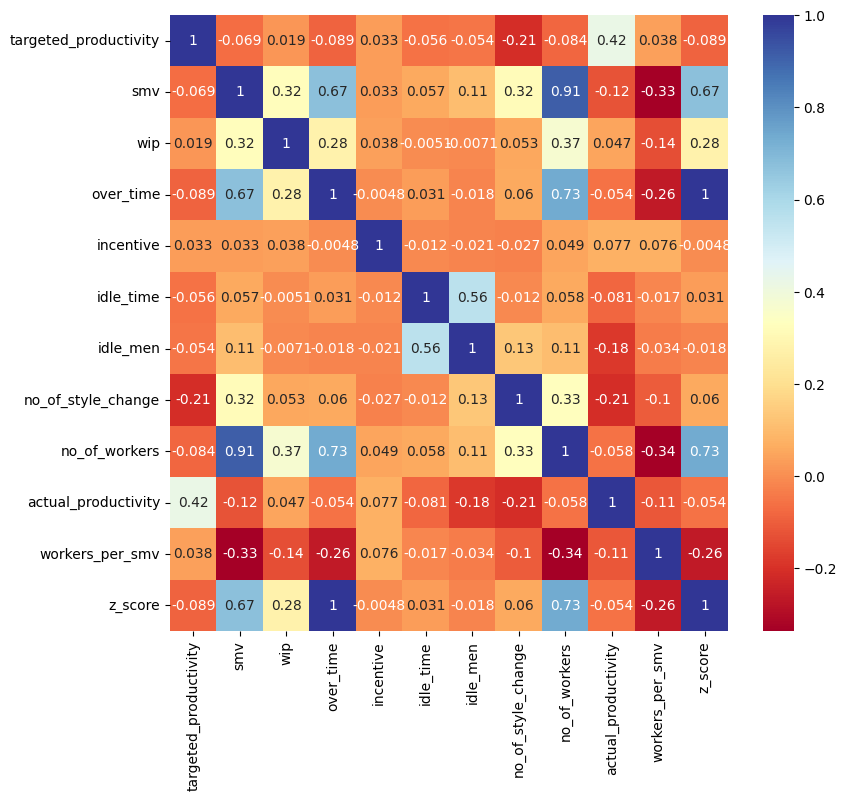

In [372]:
plt.figure(figsize = (9,8))
corr_linear = df_linear.corr()
sns.heatmap(corr_linear, annot=True, cmap=plt.cm.RdYlBu)
plt.show()

We will focus on selecting features with a correlation greater than 0.25.

Initially, the plan was to choose features with a correlation above 0.5; however, this resulted in fewer features with lower variability, which slightly reduced the consistency with the accuracy of the model. By lowering the threshold to 0.25, we capture a broader set of features, allowing for more variability and potentially improving model performance.

In [373]:
target_corr = abs(corr_linear['over_time'])
pos_corr_target = target_corr[target_corr > 0.25]
pos_corr_target

,over_time
smv,0.674887
wip,0.276529
over_time,1.000000
no_of_workers,0.734164
workers_per_smv,0.262072
z_score,1.000000


Here we drop all unnecessary features.

In [374]:
x = x.drop(['targeted_productivity', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'actual_productivity', 'workers_per_smv', 'z_score'], axis=1)
x

,smv,wip,no_of_workers
date,,,
2015-01-01,0.450252,0.047920,0.655172
2015-01-01,0.020132,0.000000,0.068966
2015-01-01,0.164731,0.041865,0.327586
2015-01-01,0.164731,0.041865,0.327586
2015-01-01,0.445219,0.050601,0.620690
...,...,...,...
2015-03-11,0.000000,0.000000,0.068966
2015-03-11,0.019357,0.000000,0.068966
2015-03-11,0.019357,0.000000,0.068966


In [375]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(718, 3) (718,)
(479, 3) (479,)


## Analytical Solution

Now, let's begin with the analytical solution. We will be using the `garments.py` to store our functions for analytical solution.

In [376]:
from garments import AnalyticalMethod

Compute the weights by calling the function `compute_weights()` and assign the return value to variable `W`.

In [377]:
analytical_method = AnalyticalMethod()

W = analytical_method.compute_weights(x_train, y_train.to_numpy().reshape(-1, 1))

Then, we will get the predicted `y` values and assign the return value to variable `y_predicted`, which should mostly fall under 0.0 to 0.1 and 0.2 to 0.3.

In [395]:
y_predict = analytical_method.predict(x_test)
y_predict[0:10]

array([[0.06294563],
       [0.26713953],
       [0.27159611],
       [0.27810233],
       [0.06269557],
       [0.2691999 ],
       [0.16319497],
       [0.1730143 ],
       [0.27371074],
       [0.09301873]])

We will be creating a scatter plot that visualizes how residuals are distributed across predicted values.

Ideally, residuals should be randomly scattered around 0, showing that the model does not systematically over- or under-predict.

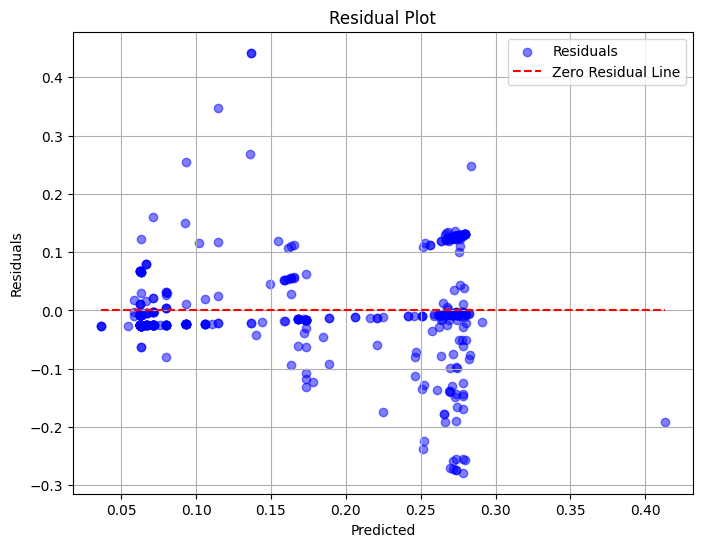

In [379]:
y_predict = y_predict.flatten()


residuals = y_test - y_predict
plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals)
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

Here we can see that the residuals are scattered around the zero line , with no clear upward or downward trend. In addition, the randomness of the residuals suggests that the model is fitting the data reasonably. There are also no visible patterns, such as curves or clusters in the residuals, which means the model is not missing any significant relationships in the data. This indicates that the model doesn't exhibit systematic errors, which is a good sign.

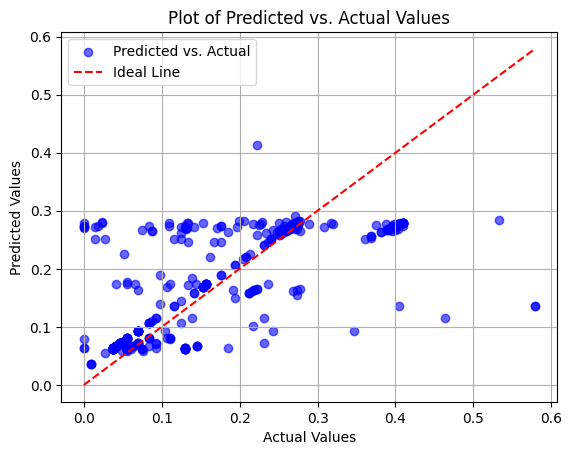

In [380]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

plt.show()

Based on the graph, while there is a clear upward trend, there are noticeable deviations where the predicted values do not match the actual values perfectly. This can be seen for some low and mid-range actual values, the predicted values tend to be consistently lower than the actual values.

In the higher range of actual values, there seems to be some under-prediction, where the predicted values are consistently below the actual values. This might suggest that the model struggles to capture the upper end of the data.

However, the model is doing reasonably well overall, as the predicted values follow the trend of the actual values.

In [381]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the test set
y_predict = analytical_method.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.007202531270355614
Root Mean Squared Error (RMSE): 0.0848677280852717
R² Score: 0.5639073728606584


In Mean Squared Error (MSE), 0.007 indicates that, on average, the squared error between the predicted and actual overtime hours is very low. This suggests that the model's predictions are fairly close to the actual values.

Root Mean Squared Error (RMSE):
0.084 minutes is the average magnitude of prediction error in the same unit as the `over_time`. A prediction error of around this number is relatively small, which is a positive outcome for this task.

In the R² Score, 0.564 indicates that the model explains about 56.4% of the variability in overtime hours. While this shows the model has some predictive power, nearly half of the variability remains unexplained. For a task like predicting overtime hours, this suggests there may be other factors influencing the outcome that the model hasn't accounted for, which can be equated to the fact that we are only looking at 3 out of 15 features due to its low correlation to other features.

## Gradient Descent

In [401]:
from sklearn.linear_model import SGDRegressor

Before we start, we will be using GridSearchCV, which is a tool for systematically searching the best combination of hyperparameters for a given model by testing all specified parameter combinations. The specified parameter combinations we will be looking into is:

eta0:

*   eta0
  *  The initial learning rate
  * Values to test: [0.001, 0.01, 0.1].
*   max_iter
  * The maximum number of iterations allowed for the optimization process to converge.
  * Values to test: [1000, 5000, 10000].
* penalty
  * The type of regularization to apply:
'l2': Ridge regularization.
'l1': Lasso regularization.
None: No regularization.
  * Values to test: ['l2', 'l1', None].
* learning_rate
  * The schedule for adjusting the learning rate:
'constant': Keeps the learning rate fixed.
'invscaling': Decreases the learning rate inversely with time.
'adaptive': Adjusts the learning rate based on model performance.
  * Values to test: ['constant', 'invscaling', 'adaptive'].
* alpha
  * Regularization strength (applies to 'l2' and 'l1' penalties).
Higher values mean stronger regularization.
  * Values to test: [0.0001, 0.001, 0.01].


In [402]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'eta0': [0.001, 0.01, 0.1],             # Learning rate options
    'max_iter': [1000, 5000, 10000],         # Number of iterations
    'penalty': ['l2', 'l1', None],           # Regularization types: L2 (Ridge), L1 (Lasso), and no regularization
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule options
    'alpha': [0.0001, 0.001, 0.01]           # Regularization strength for L2 and L1
}

grid_search = GridSearchCV(SGDRegressor(random_state=1), param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

best_params = grid_search.best_params_


best_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'max_iter': 1000, 'penalty': 'l1'}
Best Score (Negative MSE): -0.00814248419629542


Now we will create the model using the best parameters.

In [415]:
model = SGDRegressor(alpha=best_params['alpha'], eta0=best_params['eta0'],
                     max_iter=best_params['max_iter'], penalty=best_params['penalty'],
                     learning_rate=best_params['learning_rate'],
                     random_state=1, verbose=1)

First, we will see how it performs after 1 training epoch and assign the return value to variable `y_predicted`.

In [416]:
model.partial_fit(x_train, y_train)

-- Epoch 1
Norm: 0.35, NNZs: 2, Bias: 0.065298, T: 718, Avg. loss: 0.004745
Total training time: 0.00 seconds.


SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='adaptive', penalty='l1',
             random_state=1, verbose=1)

In [419]:
y_predict = model.predict(x_test)

(479,)

Then, just like before let's graph and observe.

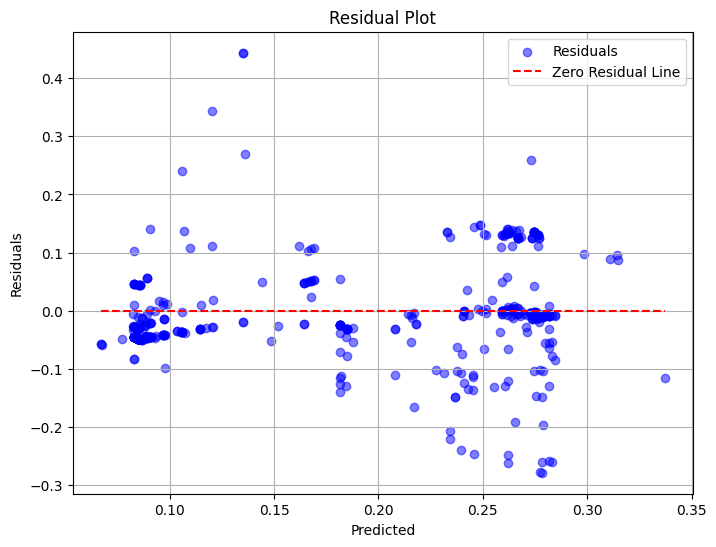

In [407]:
residuals = y_test - y_predict
plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# horizontal line at 0 (zero residuals)
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

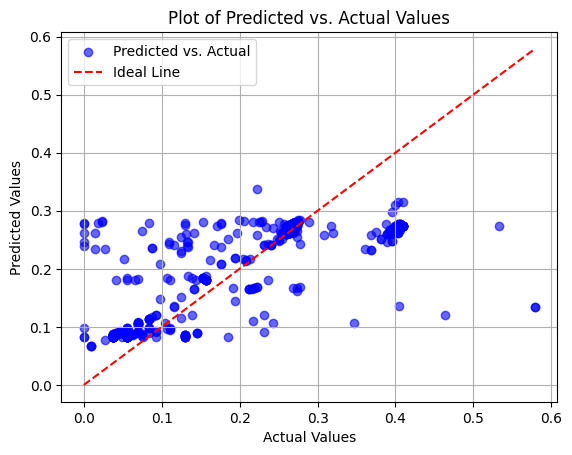

In [408]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

plt.show()

Based on the graphs, at 1 epoch, the model shows reasonable predictions but likely has room for improvement as indicated by some variance from the ideal lines. But, the model’s performance will likely improve as it goes through more epochs.

After this, we can finish training the model by calling the `fit()` function of the model and grph it again.

In [409]:
model.fit(x_train, y_train)

-- Epoch 1
Norm: 0.35, NNZs: 2, Bias: 0.065298, T: 718, Avg. loss: 0.004745
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.45, NNZs: 2, Bias: 0.060207, T: 1436, Avg. loss: 0.004410
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.50, NNZs: 2, Bias: 0.051923, T: 2154, Avg. loss: 0.004295
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 2, Bias: 0.047293, T: 2872, Avg. loss: 0.004375
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.61, NNZs: 1, Bias: 0.039902, T: 3590, Avg. loss: 0.004348
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.65, NNZs: 1, Bias: 0.046311, T: 4308, Avg. loss: 0.004286
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 1, Bias: 0.051027, T: 5026, Avg. loss: 0.004121
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.68, NNZs: 1, Bias: 0.049463, T: 5744, Avg. loss: 0.004090
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.68, NNZs: 1, Bias: 0.034690, T: 6462, Avg. loss: 0.004081
Total training time: 0.01 se

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='adaptive', penalty='l1',
             random_state=1, verbose=1)

In [425]:
y_predict = model.predict(x_test)

(479,)

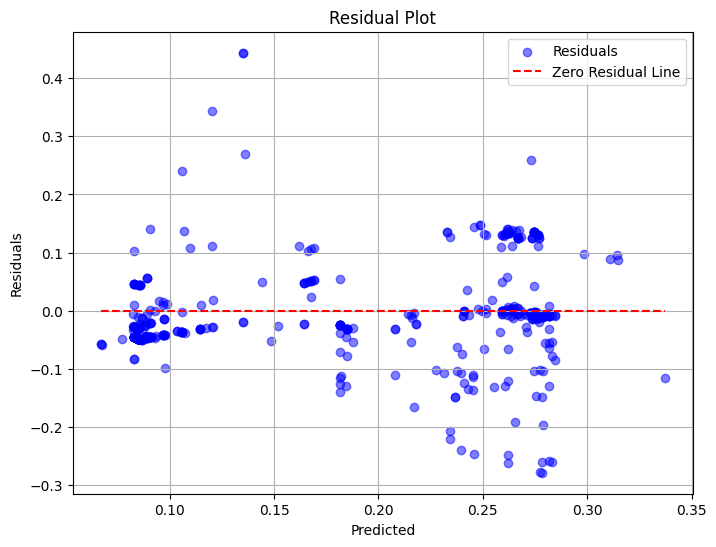

In [427]:
y_predict = y_predict.flatten()

residuals = y_test - y_predict

plt.figure(figsize=(8, 6))

plt.scatter(y_predict, residuals, color='blue', alpha=0.5, label='Residuals')

# Add horizontal line at 0 (zero residuals) with label
plt.hlines(y=0, xmin=y_predict.min(), xmax=y_predict.max(), colors='red', linestyles='dashed', label='Zero Residual Line')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.legend()
plt.grid()
plt.show()

Here we are finally getting the similar graph to the one we had before, indicating that the model doesn't exhibit systematic errors.

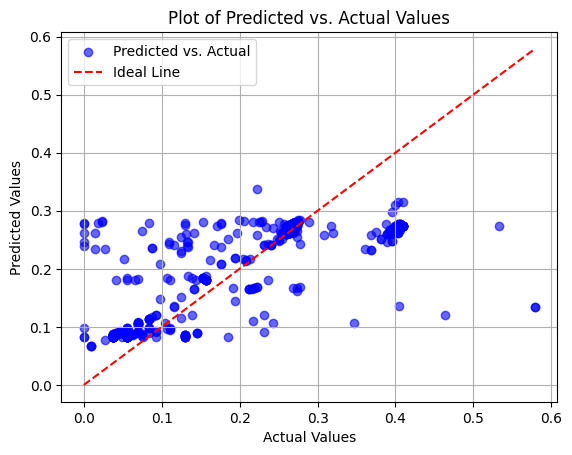

In [428]:
# Scatter plot of predicted vs actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict, alpha=0.6, label="Predicted vs. Actual", color="blue")

# Diagonal line
min_val = min(min(y_test), min(y_predict))
max_val = max(max(y_test), max(y_predict))
ideal_line, = ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

ax.set_title("Plot of Predicted vs. Actual Values")
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.legend()
ax.grid()

plt.show()

Again, we are seeing  similar graph to the one we had before in the analytical solution. Here the model is doing reasonably well overall, since the predicted values follow the trend of the actual values.

In [393]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate performance on the test set
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.007216441319688771
Root Mean Squared Error (RMSE): 0.08494963990323191
R² Score: 0.56306515923747


Similar to the previous result:

In Mean Squared Error (MSE), 0.0.00721 it is higher than analytical solution's 0.00720, which indicates that, on average, the squared error between the predicted and actual overtime hours is very low.

In Root Mean Squared Error (RMSE), 0.085 minutes is the average magnitude of prediction error which is higher than analytical solition's 0.0848.

In the R² Score, 0.563 indicates that the model explains about 56.3% of the variability in overtime hours, but is lower than analytical solution's 0.564.

## Conclusion for Linear Regression


We can conclude that gradient descent is less accurate than the analytical solution in this scenario. The analytical solution achieves a zero loss, providing exact results, whereas gradient descent iteratively minimizes the loss and may not reach the exact minimum. While the analytical solution is precise, it can be computationally expensive, especially for larger datasets. Given our comparatively smaller dataset, the computational cost is manageable, but gradient descent, despite the fine tuning, is better suited for larger datasets where its scalability and efficiency outweigh its limitations in precision.

We can also see that our models are overall effective for this data set.  